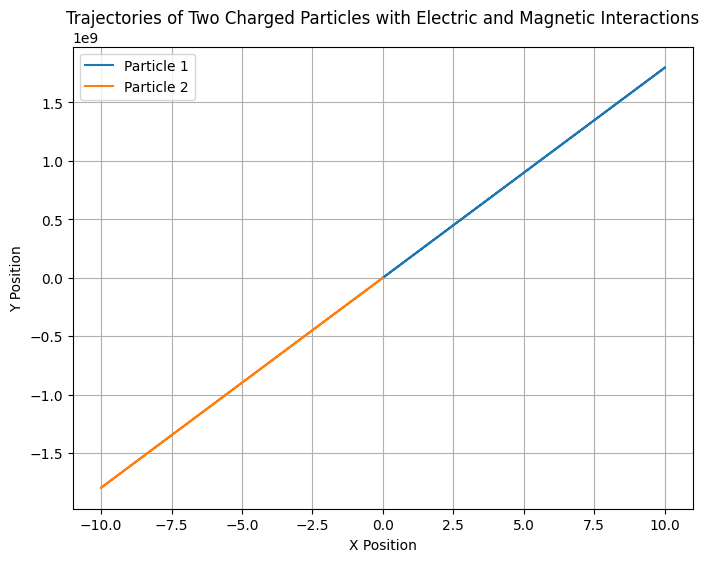

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q1 = 1.0  # Charge of particle 1 (e.g., Coulombs)
q2 = -1.0  # Charge of particle 2 (e.g., Coulombs)
m1 = 1.0  # Mass of particle 1 (e.g., kilograms)
m2 = 1.0  # Mass of particle 2 (e.g., kilograms)
epsilon_0 = 8.854187817e-12  # Permittivity of free space (F/m)
mu_0 = 4 * np.pi * 1e-7  # Permeability of free space (T*m/A)

# Initial conditions
initial_position1 = np.array([0.0, 0.0, 0.0])  # Initial position of particle 1 (x, y, z)
initial_position2 = np.array([1.0, 0.0, 0.0])  # Initial position of particle 2 (x, y, z)
initial_velocity1 = np.array([0.0, 0.0, 1.0])  # Initial velocity of particle 1 (x, y, z)
initial_velocity2 = np.array([0.0, 0.0, -1.0])  # Initial velocity of particle 2 (x, y, z)

# Electric field (uniform electric field in the z-direction)
electric_field = np.array([0.0, 0.0, 1.0])  # (Ex, Ey, Ez) in volts/meter

# Magnetic field (uniform magnetic field in the y-direction)
magnetic_field = np.array([0.0, 1.0, 0.0])  # (Bx, By, Bz) in tesla

# Time parameters
dt = 0.01  # Time step (seconds)
num_steps = 1000  # Number of time steps

# Arrays to store particle positions over time
positions1 = [initial_position1]
positions2 = [initial_position2]

# Simulation loop
for step in range(num_steps):
    # Calculate the distance between the particles
    r = np.linalg.norm(initial_position2 - initial_position1)
    
    # Calculate the electric field produced by particle 1 at the position of particle 2
    electric_field1_to_2 = (1 / (4 * np.pi * epsilon_0)) * (q1 / r**2) * (initial_position2 - initial_position1) / r
    
    # Calculate the electric field produced by particle 2 at the position of particle 1
    electric_field2_to_1 = (1 / (4 * np.pi * epsilon_0)) * (q2 / r**2) * (initial_position1 - initial_position2) / r
    
    # Calculate the magnetic field contribution from particle 1 at the position of particle 2
    magnetic_field1_to_2 = mu_0 * q1 * np.cross(initial_velocity1, (initial_position2 - initial_position1)) / (4 * np.pi * r**3)
    
    # Calculate the magnetic field contribution from particle 2 at the position of particle 1
    magnetic_field2_to_1 = mu_0 * q2 * np.cross(initial_velocity2, (initial_position1 - initial_position2)) / (4 * np.pi * r**3)
    
    # Calculate the Lorentz force for particle 1
    force1 = q1 * (electric_field1_to_2 + initial_velocity1 * np.cross(magnetic_field1_to_2, magnetic_field)) + q1 * electric_field2_to_1
    
    # Calculate the Lorentz force for particle 2
    force2 = q2 * (electric_field2_to_1 + initial_velocity2 * np.cross(magnetic_field2_to_1, magnetic_field)) + q2 * electric_field1_to_2
    
    # Calculate the acceleration for particle 1
    acceleration1 = force1 / m1
    
    # Calculate the acceleration for particle 2
    acceleration2 = force2 / m2
    
    # Update velocity and position for particle 1 using the equations of motion
    initial_velocity1 += acceleration1 * dt
    initial_position1 += initial_velocity1 * dt
    
    # Update velocity and position for particle 2 using the equations of motion
    initial_velocity2 += acceleration2 * dt
    initial_position2 += initial_velocity2 * dt
    
    # Append the positions to the arrays
    positions1.append(np.copy(initial_position1))
    positions2.append(np.copy(initial_position2))

# Convert position arrays to NumPy arrays for plotting
positions1 = np.array(positions1)
positions2 = np.array(positions2)

# Plot the trajectories of the particles
plt.figure(figsize=(8, 6))
plt.plot(positions1[:, 2], positions1[:, 0], label='Particle 1')
plt.plot(positions2[:, 2], positions2[:, 0], label='Particle 2')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Trajectories of Two Charged Particles with Electric and Magnetic Interactions')
plt.legend()
plt.grid(True)
plt.show()


array([10.  ,  0.01,  0.02, ...,  9.98,  9.99, 10.  ])